In [1]:
import geopandas as gpd
import glob
import numpy as np
import pandas as pd
from pathlib import Path

In [214]:
# Define the input and output paths
agg_level = '1' # Aggregation level of the shapefiles, 1 to 10 (10 coarsest, 1 finest)
pfaf_path = Path('/Users/wmk934/data/Global_geospatial/MERIT_Hydro_basins/pfafstetter/aggregate/')
pfaf_files = glob.glob(str(pfaf_path) + f'/aggBasin_{agg_level}_G7*.shp')

zonal_dir = Path('/Users/wmk934/data/perceptual_models/data/zonal_stats/')
zonal_file = 'merit_hydro_basins_lgrip30_counts.shp'

output_file = 'agg_pfaf_to_merit_orig.shp'

In [21]:
# Read the pfaf shapefiles
pfafs = [gpd.read_file(file) for file in pfaf_files]
pfaf = pd.concat(pfafs, ignore_index=True)

In [215]:
# Read the zonal stat shapefile
gdf = gpd.read_file(zonal_dir/zonal_file)
gdf.set_index('COMID', inplace=True)

In [219]:
# Match the small shapes to Pfaf codes
pfaf_all = gdf[['geometry']].copy()
pfaf_all['pfaf'] = 'n/a'

In [220]:
for ix, row in pfaf_all.iterrows():
    touched_polygons = pfaf.intersects(row['geometry']) # includes edges as well as big overlap
    if touched_polygons.sum() > 0:
        max_area = 0
        max_intersecting_polygon = None
        for idx, intersecting_polygon in pfaf[pfaf.intersects(row['geometry'])].iterrows():
            # Calculate intersection area
            intersection_area = intersecting_polygon['geometry'].intersection(row['geometry']).area
            
            # Check if the intersection area is greater than the maximum area found so far
            if intersection_area > max_area:
                max_area = intersection_area
                max_intersecting_polygon = intersecting_polygon
        
        # When we have checked all intersections, take the Pfaf code from the largest one
        pfaf_code = max_intersecting_polygon['pfaf']
    else:
        pfaf_code = 'not assigned'
    pfaf_all.at[ix, 'pfaf'] = pfaf_code

In [221]:
pfaf_all.to_file(zonal_dir / output_file)

### Dev

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Match the small shapes to Pfaf codes
pfaf_all = gdfs[1][['unitarea','geometry']].copy()
pfaf_all['pfaf'] = 'n/a'
ic = np.where(pfaf.columns == 'pfaf')[0][0]

In [ ]:
# Select a test case
ix = 0
row = pfaf_all.iloc[ix]

In [ ]:
# We know the first row in the pfaf_all dataframe intersects with this one
right_row = pfaf[pfaf['pfaf'] == 'L0C2R22783']

In [193]:
max_area = 0
max_intersecting_polygon = None
for idx, intersecting_polygon in pfaf[pfaf.intersects(row['geometry'])].iterrows():
    # Calculate intersection area
    intersection_area = intersecting_polygon['geometry'].intersection(row['geometry']).area
    
    # Check if the intersection area is greater than the maximum area found so far
    if intersection_area > max_area:
        max_area = intersection_area
        max_intersecting_polygon = intersecting_polygon

# When we have checked all intersections, take the Pfaf code from the largest one
pcode = max_intersecting_polygon['pfaf']
print(f'adding: {pcode}')

adding: L0C2R22783


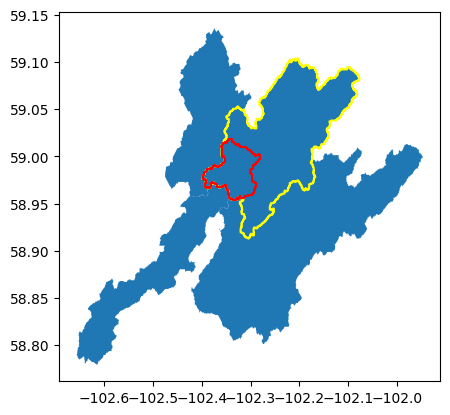

In [194]:
ax = plt.subplot()

# all intersections
pfaf[pfaf.intersects(row['geometry'])].plot(ax=ax)

# Take Pfaf code from this one
geometry_to_plot = max_intersecting_polygon.geometry
x, y = geometry_to_plot.exterior.xy
ax.plot(x, y, color='yellow')

# polygon of interest
geometry_to_plot = row.geometry
x, y = geometry_to_plot.exterior.xy
ax.plot(x, y, color='red')